<a href="https://colab.research.google.com/github/BiancadeFrancisco/Regressao_Linear_ExperienciaVendas/blob/main/Regress%C3%A3o_Linear_Pr%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
dataset = {"tempo":[1,3,4,4,6,8,10,10,11,13],
           "vendas":[91,110,106,116,119,129,139,143,138,159]}

dataset = pd.DataFrame(dataset)

dataset.head()

,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119


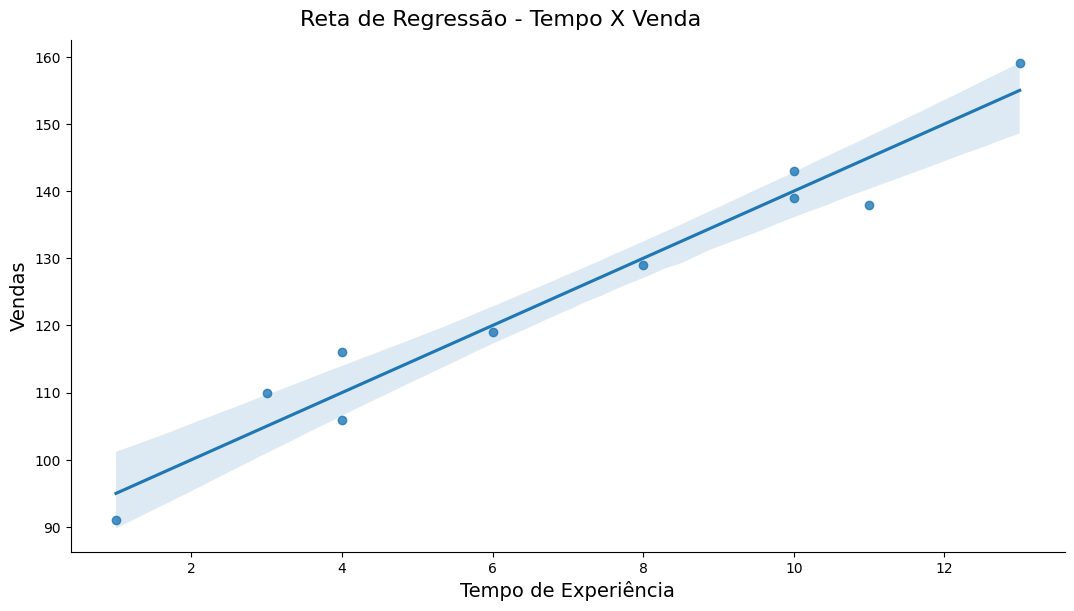

In [ ]:
# PLOTAR VISUALIZAÇÃO

ax = sns.lmplot(x="tempo", y="vendas", data=dataset)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle("Reta de Regressão - Tempo X Venda", fontsize=16, y=1.02)
ax.set_xlabels("Tempo de Experiência", fontsize=14)
ax.set_ylabels("Vendas", fontsize=14)
ax;

In [ ]:
# VERIFICAR A RELAÇÃO ENTRE AS VARIÁVEIS: VENDAS E TEMPO DE EXPERIÊNCIA

dataset.corr()

# resultado de 0.97 = mto próx de 1 = diretamente proporcional = forte coeficiente de linearidade positiva

,tempo,vendas
tempo,1.000000,0.976883
vendas,0.976883,1.000000


In [ ]:
# IMPORTAR BIBLIOTECA PARA ANÁLISAR ESTATISTICAMENTE

import statsmodels.api as sm

In [ ]:
# DESCREVENDO AS VARIÁVEIS

Y = dataset.vendas
X = sm.add_constant(dataset.tempo)


In [ ]:
# CRIANDO VARIÁVEL PARA RESULTADO DA REGRESSÃO
# .fit = treinar

resultado_regressao = sm.OLS(Y,X).fit()
print(resultado_regressao.summary())

# dessa maneira consigo visualizar:
# r² = R-squared = 0,954
# coef const = 90
# coef tempo = 5 (fator multiplicador = a cada vez que eu aumento 1 na minha variável tempo, preciso multiplicar por 5 para prever esse resultado)

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           1.22e-06
Time:                        13:22:25   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# VERIFICAR O RESÍDUO (O QUANTO QUE MEU MODELO ESTÁ ERRANDO)
# criei uma coluna chamada "Y_previsto" e usar o resultado da regressão, que foi o que eu fiz .fit() e multiplicar pelo .predict()

dataset['Y_previsto'] = resultado_regressao.predict()

dataset

,tempo,vendas,Y_previsto
0,1,91,95.0
1,3,110,105.0
2,4,106,110.0
3,4,116,110.0
4,6,119,120.0
5,8,129,130.0
6,10,139,140.0
7,10,143,140.0
8,11,138,145.0
9,13,159,155.0


In [ ]:
# CALCULAR O ERRO

dataset["Residuo"] = dataset["Y_previsto"]-dataset["vendas"]

dataset

,tempo,vendas,Y_previsto,Residuo
0,1,91,95.0,4.0
1,3,110,105.0,-5.0
2,4,106,110.0,4.0
3,4,116,110.0,-6.0
4,6,119,120.0,1.0
5,8,129,130.0,1.0
6,10,139,140.0,1.0
7,10,143,140.0,-3.0
8,11,138,145.0,7.0
9,13,159,155.0,-4.0


O MINISTÉRIO DA EDUCAÇÃO SOLICITOU A VOCÊ UMA PREVISÃO DO PERCENTUAL DE ALUNOS QUE SERÃO APROVADOS NO ANO DE 2017, TENDO COMO BASE O ANO DE 2016.
CRIE UM MODELOQUE CONSIGA PREVER O VALOR DE APROVAÇÃO EM 2016 COM AS AAPROVAÇÕES DE 2015.
FAÇA O TRATAMENTO DE DADOS APRENDIDO E FAÇA A REGRESSÃO LINEAR E TIRE O RESÍDUO PARA SABER EM QUANTO O MODELO ESTÁ ERRANDO.


In [ ]:
aprovacao_alunos = pd.read_excel("/content/C├│pia de aprovacao_alunos (1).xlsx")
aprovacao_alunos.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


In [ ]:
# VERIFICAR SE HÁ LINHAS DUPLICADAS:

aprovacao_alunos.duplicated().sum()

0

In [ ]:
# VERIFICAR SE HÁ VALORES FALTANTES:

aprovacao_alunos.isna().sum()

UF          0
ano_2015    0
ano_2016    0
dtype: int64

In [ ]:
# VERIFICAR INFORMAÇÕES SOBRE OS DADOS:

aprovacao_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UF        27 non-null     object
 1   ano_2015  27 non-null     int64 
 2   ano_2016  27 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 776.0+ bytes


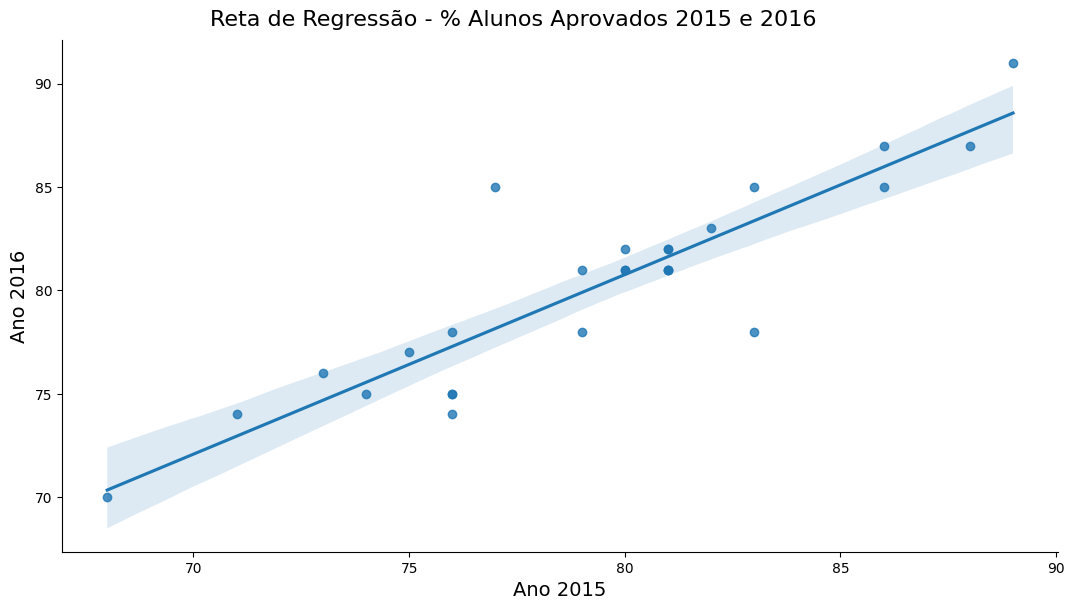

In [ ]:
# PLOTAR VISUALIZAÇÃO

ax = sns.lmplot(x="ano_2015", y="ano_2016", data=aprovacao_alunos)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle("Reta de Regressão - % Alunos Aprovados 2015 e 2016", fontsize=16, y=1.02)
ax.set_xlabels("Ano 2015", fontsize=14)
ax.set_ylabels("Ano 2016", fontsize=14)
ax;

In [ ]:
# VERIFICAR A RELAÇÃO ENTRE AS VARIÁVEIS: VENDAS E TEMPO DE EXPERIÊNCIA

aprovacao_alunos.corr()

# resultado de 0.89 = mto próx de 1 = diretamente proporcional = forte coeficiente de linearidade positiva

<ipython-input-29-803a3e3614b4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  aprovacao_alunos.corr()


,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [ ]:
# IMPORTAR BIBLIOTECA PARA ANÁLISAR ESTATISTICAMENTE

import statsmodels.api as sm

In [ ]:
# DESCREVENDO AS VARIÁVEIS

Y = aprovacao_alunos.ano_2016
X = sm.add_constant(aprovacao_alunos.ano_2015)

In [ ]:
# CRIANDO VARIÁVEL PARA RESULTADO DA REGRESSÃO
# .fit = treinar

resultado_regressao = sm.OLS(Y,X).fit()
print(resultado_regressao.summary())

# dessa maneira consigo visualizar:
# r² = R-squared = 0,801
# coef const = 11,3143 (ponto de início)
# coef ano 2015 = 0,8681 (fator multiplicador)

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           3.02e-10
Time:                        14:00:12   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [ ]:
# VERIFICAR O RESÍDUO (O QUANTO QUE MEU MODELO ESTÁ ERRANDO)
# criei uma coluna chamada "Y_previsto" e usar o resultado da regressão, que foi o que eu fiz .fit() e multiplicar pelo .predict()

aprovacao_alunos['Y_previsto'] = resultado_regressao.predict()

aprovacao_alunos.head()

,UF,ano_2015,ano_2016,Y_previsto
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089


In [ ]:
# CALCULAR O ERRO

aprovacao_alunos["Residuo"] = aprovacao_alunos["Y_previsto"]-aprovacao_alunos["ano_2016"]

aprovacao_alunos.head()

,UF,ano_2015,ano_2016,Y_previsto,Residuo
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
